In [1]:
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sb
import re
import nltk
import pickle
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('fake-news/train.csv')

In [3]:
train_df.head(15)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [4]:
train_df = train_df.drop("author", axis = 1)
train_df = train_df.drop("title", axis = 1)
train_df = train_df.drop("id", axis = 1)

In [5]:
train_df.shape

(20800, 2)

In [6]:
train_df.head(15)

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
5,"In these trying times, Jackie Mason is the Voi...",0
6,Ever wonder how Britain’s most iconic pop pian...,1
7,"PARIS — France chose an idealistic, traditi...",0
8,Donald J. Trump is scheduled to make a highly ...,0
9,A week before Michael T. Flynn resigned as nat...,0


<AxesSubplot:xlabel='label', ylabel='count'>

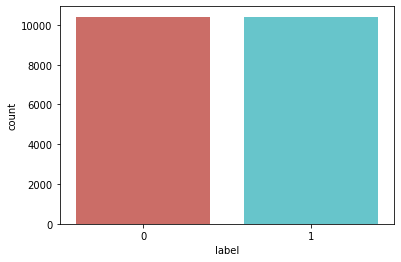

In [7]:
def create_distribution(dataFile):
    return sb.countplot(x='label', data=dataFile, palette='hls')

# ukiita hii function utaona kwamba fake na real data zimekua distributed sawa
create_distribution(train_df)

In [8]:
def data_qualityCheck():
    print("Checking data qualitites...")
    train_df.isnull().sum()
    train_df.info()  
    print("check finished.")
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20761 non-null  object
 1   label   20800 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 325.1+ KB
check finished.


In [9]:
train_df = train_df.dropna()

In [10]:
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20761 entries, 0 to 20799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20761 non-null  object
 1   label   20761 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 486.6+ KB
check finished.


In [11]:
train_df.shape

(20761, 2)

In [12]:
train_df.head(10)

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
5,"In these trying times, Jackie Mason is the Voi...",0
6,Ever wonder how Britain’s most iconic pop pian...,1
7,"PARIS — France chose an idealistic, traditi...",0
8,Donald J. Trump is scheduled to make a highly ...,0
9,A week before Michael T. Flynn resigned as nat...,0


In [13]:
train_df.reset_index(drop= True,inplace=True)

In [14]:
train_df.head(10)

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
5,"In these trying times, Jackie Mason is the Voi...",0
6,Ever wonder how Britain’s most iconic pop pian...,1
7,"PARIS — France chose an idealistic, traditi...",0
8,Donald J. Trump is scheduled to make a highly ...,0
9,A week before Michael T. Flynn resigned as nat...,0


In [15]:
label_train = train_df.label

In [16]:
label_train.head(10)

0    1
1    0
2    1
3    1
4    1
5    0
6    1
7    0
8    0
9    0
Name: label, dtype: int64

In [17]:
train_df = train_df.drop("label", axis = 1)

In [18]:
train_df.head(10)

,text
0,House Dem Aide: We Didn’t Even See Comey’s Let...
1,Ever get the feeling your life circles the rou...
2,"Why the Truth Might Get You Fired October 29, ..."
3,Videos 15 Civilians Killed In Single US Airstr...
4,Print \nAn Iranian woman has been sentenced to...
5,"In these trying times, Jackie Mason is the Voi..."
6,Ever wonder how Britain’s most iconic pop pian...
7,"PARIS — France chose an idealistic, traditi..."
8,Donald J. Trump is scheduled to make a highly ...
9,A week before Michael T. Flynn resigned as nat...


In [19]:
train_df['text'][2182]

'Comments Actor Steven Seagal has just stood up for America, while the rest of Hollywood remains silent. This week has been rough for our country. First, Democratic nominee Hillary Clinton collapsed at the 9/11 memorial. Then, she called millions of hardworking Americans “deplorable.” As if that weren’t enough, NFL players throughout the country have been blatantly disrespecting the American flag. Needless to say, Seagal had enough. “I think the most important job as Secretary of State is ensuring our people don’t get killed,” Seagal tweeted. “If you can’t do [email protected] “Pneumonia or not, she is going to be disastrous for the American people. #NoToHillary,” he continued. Of course, Seagal quickly became the target of liberal fire for his comments, but he refused to break down. He particularly lost it when one Twitter user tried to argued that Hillary was the most capable for the presidency. “Capable? Capable of leaving AMERICANS to die. Capable of disregarding law. Capable of di

In [20]:
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))

In [21]:
stpwrds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
for x in range(len(train_df)) :
    corpus = []
    review = train_df['text'][x]
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = review.lower()
    review = nltk.word_tokenize(review)
    for y in review :
        if y not in stpwrds :
            corpus.append(lemmatizer.lemmatize(y))
    review = ' '.join(corpus)
    train_df['text'][x] = review      

In [23]:
train_df['text'][20000]

'thursday oval office interview reuters president trump said chance could end major major conflict north korea absolutely wed love solve thing diplomatically difficult president added china clearly play major role diplomatic resolution trump suggested would anger beijing another phone call taiwan president explicitly stated wanted avoid causing difficulty chinese president xi jinping everything power help u big situation praised xi good man trying hard avoid turmoil death korean peninsula good man got know well said trump said love china love people china know would like able something perhaps possible cant trump also surprisingly sympathetic north korean dictator kim he year old father dy took regime say want easy especially age said kim im giving credit giving credit im saying thats hard thing whether he rational opinion hope he rational hand trump played hardball south korea saying intends renegotiate deal u soon seek compensation billion cost deploying terminal high altitude area d

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(train_df['text'], label_train, test_size=0.3, random_state=1)

In [25]:
X_train

10140    comment fox news star megyn kelly finally reve...
11508    written daniel mcadams told attack iraq saddam...
4035     u representative california introduced bill bl...
4528     paris salah abdeslam thought direct participan...
2608     photo jorge lascar photo great wall china vasi...
                               ...                        
10955    daily caller progress unity found progress uni...
17289    archie elam third career transition living sta...
5192     philadelphia sometimes exhibition planned year...
12172    here something interesting unz review recipien...
235      changing montenegrin leader change ideology so...
Name: text, Length: 14532, dtype: object

In [26]:
X_train.shape

(14532,)

In [27]:
Y_train

10140    1
11508    1
4035     0
4528     0
2608     1
        ..
10955    1
17289    0
5192     0
12172    1
235      1
Name: label, Length: 14532, dtype: int64

In [28]:
tfidf_v = TfidfVectorizer()
tfidf_X_train = tfidf_v.fit_transform(X_train).toarray()
tfidf_X_test = tfidf_v.transform(X_test)

In [29]:
tfidf_X_train.shape

(14532, 137427)

In [30]:
tfidf_X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10234959, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [31]:
tfidf_v.get_feature_names()[:1000]

c:\Users\AkaTech\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aaa',
 'aaaa',
 'aaaaadd',
 'aaaaggg',
 'aaaasetlayoutnew',
 'aaah',
 'aaajiao',
 'aaany',
 'aab',
 'aabenraa',
 'aac',
 'aacak',
 'aachen',
 'aada',
 'aadara',
 'aade',
 'aades',
 'aadi',
 'aadido',
 'aadidura',
 'aadiendo',
 'aadmi',
 'aadvantage',
 'aah',
 'aaiball',
 'aaima',
 'aaja',
 'aakre',
 'aali',
 'aalto',
 'aam',
 'aamaq',
 'aamer',
 'aamon',
 'aan',
 'aand',
 'aangeklaagd',
 'aangenomen',
 'aangezien',
 'aankhen',
 'aankomst',
 'aankondigde',
 'aankondiging',
 'aannemen',
 'aanstaande',
 'aantreden',
 'aanwezigheid',
 'aanzien',
 'aap',
 'aaps',
 'aapse',
 'aar',
 'aardbevingen',
 'aarde',
 'aardvark',
 'aarhus',
 'aarn',
 'aaron',
 'aaronkleinshow',
 'aarp',
 'aasif',
 'aavs',
 'ab',
 'aba',
 'abaaoud',
 'abaaouds',
 'ababa',
 'ababas',
 'aback',
 'abacus',
 'abad',
 'abadam',
 'abadi',
 'abadis',
 'abady',
 'abajo',
 'abalada',
 'abalone',
 'abandon',
 'abandona',
 'abandonado',
 'abandonan',
 'abandonar',
 'abandond',
 'abandoned',
 'abandoning',
 'abandonment'

In [32]:
count_df = pd.DataFrame(tfidf_X_train, columns=tfidf_v.get_feature_names())

In [33]:
count_df.head()

,aa,aaa,aaaa,aaaaadd,aaaaggg,aaaasetlayoutnew,aaah,aaajiao,aaany,aab,...,zwycistwo,zx,zyaira,zyaratgah,zygankow,zylinderkopfdichtung,zytiga,zytsov,zyuganov,zzzzs
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.10235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## MODEL TRAINING

### Passive Aggressive Classifier

In [35]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
PassiveAggrClass = PassiveAggressiveClassifier()
PassiveAggrClass.fit(tfidf_X_train,Y_train)

PassiveAggressiveClassifier()

Accuracy: 95.62%
Confusion matrix, without normalization


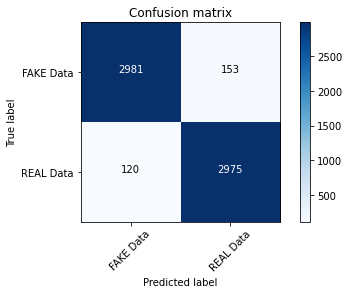

In [36]:
Y_pred = PassiveAggrClass.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(tfidf_X_train,Y_train)

LogisticRegression()

Accuracy: 94.33%
Confusion matrix, without normalization


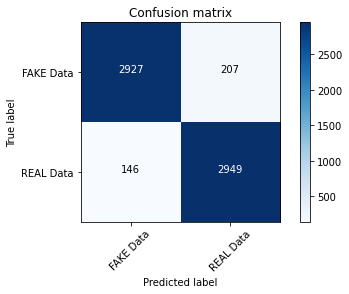

In [38]:
Y_pred = LogReg.predict(tfidf_X_test)
score = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [ ]:
pickle.dump(PassiveAggrClass, open('model2.pkl', 'wb'))
pickle.dump(tfidf_v, open('tfidfvect2.pkl', 'wb'))